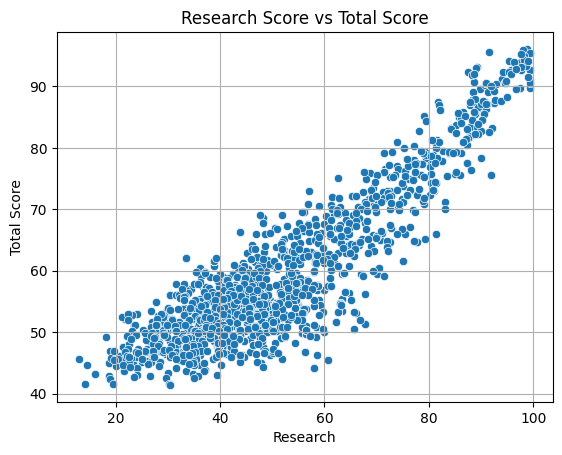

In [4]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Loaded the dataset
df = pd.read_csv('/content/sample_data/sample_data/final_merged_times_cleaned.csv')

# 3. Cleaned the data (drop NA values for relevant columns)
df = df[['research', 'total_score']].dropna()

#Filter out extreme values
df = df[(df['research'] >= 0) & (df['total_score'] >= 0)]

# 4. Visual exploration scatterplot
sns.scatterplot(data=df, x='research', y='total_score')
plt.title('Research Score vs Total Score')
plt.xlabel('Research')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()





### Visual Exploration

The scatter plot of Research Score vs Total Score shows a clear upward trend, suggesting a strong positive linear relationship. This supports the assumption that as research score increases, so does the total score.


In [5]:
# 5. Defined independent (X) and dependent (y) variables
X = df[['research']].values  # must be 2D array
y = df['total_score'].values  # 1D array


### Hypothesis

In this analysis, we aim to explore the relationship between a university's **Research Score** and its **Total Score** in the Times Higher Education ranking dataset.

**Hypothesis**:  
> Universities with higher research scores tend to have higher total scores.

We will test this hypothesis using simple linear regression, with **Research Score** as the independent variable (X) and **Total Score** as the dependent variable (y).


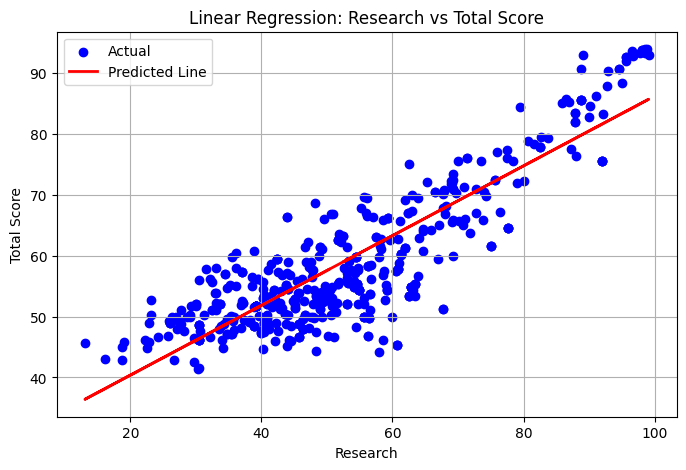

Mean Squared Error (MSE): 35.35
R² Score: 0.73


In [6]:
# 6. Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Make predictions on the test set
y_pred = model.predict(X_test)

# 9. Plot regression line with test data
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Linear Regression: Research vs Total Score')
plt.xlabel('Research')
plt.ylabel('Total Score')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))



### Model Performance and Evaluation

- **Mean Squared Error (MSE)**: 35.35  
- **R² Score**: 0.73

The R² score of **0.73** indicates that 73% of the variation in Total Scores can be explained by the Research Scores. The MSE is reasonably low, suggesting the predictions are fairly accurate. Overall, the linear model performs well for this relationship.


In [7]:
# 11. Compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Total Score': y_test,
    'Predicted Total Score': np.round(y_pred, 2)
})
print(comparison_df.head(10))

   Actual Total Score  Predicted Total Score
0                57.9                  59.05
1                55.4                  65.24
2                66.1                  69.59
3                48.5                  48.28
4                51.1                  47.48
5                78.4                  75.67
6                83.4                  79.22
7                54.8                  59.97
8                56.9                  53.67
9                52.1                  46.11


### Actual vs Predicted Values

The table below compares the actual Total Scores with those predicted by our regression model. We observe that the predicted values are close to actual values for many records, which validates the model's effectiveness.

However, there are a few records with a larger gap, which could be due to factors not captured by the research score alone.


### Reflections and Potential Bias

While the model explains a significant portion of the variance, we must consider the possibility of **bias** in the data. The Total Score likely depends on multiple factors (e.g., teaching quality, citations, industry income) that are not included in this single-variable regression.

Also, country-wise differences, institutional types, or data entry gaps may contribute to deviations in prediction. A multivariate regression model could improve prediction accuracy and reduce bias in future analysis.
